In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import ast

csv_file_path = "final-file-neural-network.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

colData = df.columns.tolist()

for col in colData:
    if col == "input" or col == 'output':
        df[col] = df[col].apply(ast.literal_eval)
        
df = df[df['input'].apply(len) == 60]
        
input_column = df['input'].values.reshape(-1, 1)

input_column = input_data = np.array(df['input'].tolist())

scaler = MinMaxScaler(feature_range=(-1, 1))
input_data_scaled = scaler.fit_transform(input_data)

# Split the data into training and testing sets
train_data = input_data_scaled[:6000]
test_data = input_data_scaled[6000:]



Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 55)             │         3,355 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 45)             │         2,295 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 40)             │         1,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 35)             │         1,435 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 30)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 35)             │         1,085 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 40)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 45)             │         1,845 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 50)             │         2,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 55)             │         2,805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 60)             │         3,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,640 (100.16 KB)

 Trainable params: 25,640 (100.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0795
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8491e-04
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2767e-04
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1667e-04
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2660e-04
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9912e-04
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0233e-04
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2999e-04
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2808e-04
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9889e-04
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6213e-04
Epoch 13/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3267e-04
Epoch 14/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3232

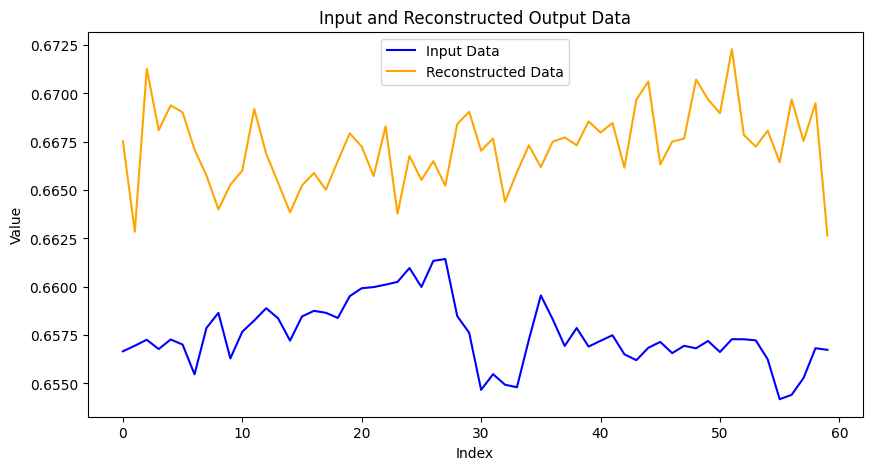

[0.63634806 0.63604189 0.63510618 0.63841527 0.63817411 0.63667234
 0.63789954 0.63699391 0.63622575 0.63493451 0.63382116 0.63587024
 0.63570948 0.63618593 0.63732723 0.63706458 0.63827745 0.63936617
 0.64013369 0.63992754 0.63934623 0.6378     0.63534265 0.63662908
 0.6361237  0.63698899 0.63885454 0.63705036 0.63549487 0.63587289
 0.63463923 0.63577398 0.63626499 0.6346382  0.63297514 0.63339955
 0.63152406 0.63257344 0.63259519 0.63172129 0.63304214 0.63239547
 0.63176821 0.63339916 0.63388954 0.6328405  0.63384654 0.63295142
 0.6329719  0.6331124  0.63238336 0.63177661 0.63159589 0.62902326
 0.62801215 0.6283372  0.62948376 0.62835525 0.62801392 0.62720582]
[0.64145947 0.6371241  0.6441934  0.642006   0.6433169  0.64322424
 0.6409954  0.63990134 0.63828564 0.63929826 0.6398184  0.6431561
 0.6403239  0.63960993 0.638178   0.6397878  0.63992524 0.63968414
 0.6405819  0.64236057 0.64133394 0.64010876 0.6429876  0.63831496
 0.6410664  0.64002806 0.64148825 0.64033276 0.6424587  0.6433

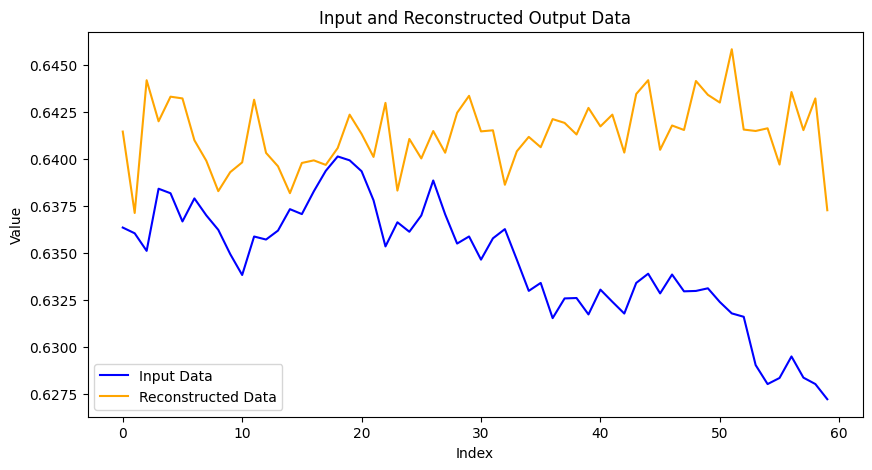

[0.62823435 0.62854352 0.62929572 0.62813373 0.62844369 0.62798575
 0.62883459 0.62959753 0.62832488 0.62781149 0.62661514 0.62741626
 0.62896828 0.62905266 0.62866422 0.63174443 0.63060037 0.63223983
 0.63308909 0.63131951 0.6323923  0.63231627 0.63330378 0.63411167
 0.63607245 0.63779124 0.637311   0.63682016 0.63451099 0.6346153
 0.63436557 0.63521851 0.63642733 0.63692534 0.63731959 0.6390644
 0.63937943 0.63995705 0.64076755 0.6411595  0.64041112 0.64060445
 0.64015173 0.63769211 0.63966919 0.63981889 0.63926582 0.6387444
 0.63726789 0.63753676 0.63763527 0.63709016 0.63769018 0.63613664
 0.63514348 0.63533351 0.63476925 0.63579278 0.63639561 0.63648989]
[0.6406145  0.6362842  0.6433496  0.6411559  0.64275825 0.6424691
 0.6402981  0.6391626  0.63768345 0.6386772  0.63910025 0.6426124
 0.63951284 0.6388354  0.63747203 0.6391823  0.6392055  0.6389215
 0.63979423 0.6416584  0.640656   0.63942194 0.64242357 0.63767844
 0.640205   0.6393881  0.64079046 0.6395854  0.64191145 0.64266616


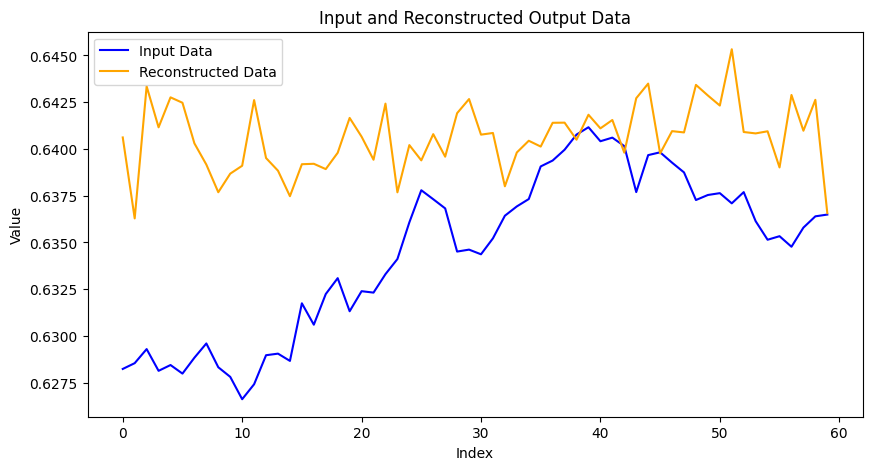

[0.63690497 0.63735303 0.63781431 0.63612763 0.63696531 0.63683527
 0.63713627 0.63758597 0.63685988 0.637506   0.63711142 0.63821952
 0.6383768  0.63838935 0.63814126 0.63740726 0.63841455 0.6378758
 0.6391567  0.63842006 0.63579219 0.63639479 0.63803258 0.63818747
 0.64018091 0.64135017 0.64258121 0.64229382 0.64014904 0.63934623
 0.63911195 0.63886752 0.63943503 0.63899059 0.63947047 0.63959415
 0.63950765 0.63891325 0.63887437 0.63983935 0.63886878 0.63859933
 0.63840302 0.63983    0.64004706 0.63777601 0.63838262 0.63895007
 0.63773951 0.63733955 0.63788413 0.63748503 0.63650565 0.63654851
 0.63595874 0.63339342 0.63264133 0.63268738 0.63267232 0.6327694 ]
[0.6451817  0.6407847  0.64807343 0.6457307  0.64713675 0.6469164
 0.6447842  0.64362264 0.6420291  0.64306855 0.6435991  0.64697105
 0.64412934 0.6432936  0.64189094 0.64349043 0.6436498  0.6432997
 0.64431274 0.646045   0.6450744  0.6438333  0.6466962  0.64203095
 0.6447193  0.64374906 0.6451012  0.6439141  0.64623845 0.647072

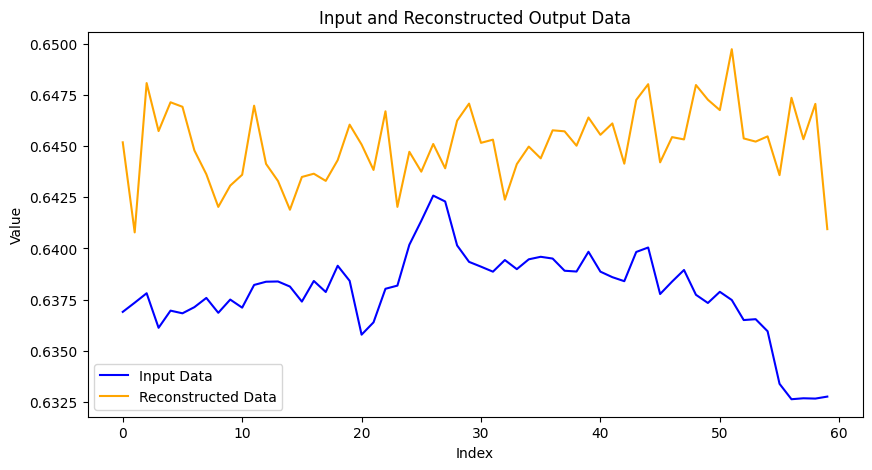

[0.63139587 0.63311967 0.63334076 0.63234059 0.63395617 0.63279639
 0.63215355 0.63276373 0.63141839 0.63117157 0.63057374 0.63203766
 0.633248   0.63237066 0.63302571 0.6318301  0.6322626  0.63210278
 0.63204354 0.6315936  0.63170718 0.63254762 0.63224151 0.63186827
 0.63222878 0.63366049 0.63473559 0.63537928 0.63588842 0.6363092
 0.63703381 0.63703875 0.63628207 0.63601219 0.63557839 0.63538182
 0.63619113 0.63693687 0.63568767 0.63586176 0.63543278 0.63530889
 0.63473416 0.63469563 0.63466245 0.63520954 0.63515848 0.63473387
 0.63564725 0.63520454 0.63445151 0.63242041 0.632995   0.63279876
 0.63167651 0.63183964 0.63172323 0.63265306 0.63258653 0.63185214]
[0.6402129  0.6358905  0.64290595 0.6407436  0.6422051  0.64198786
 0.6398528  0.6387087  0.63717    0.6381777  0.63863593 0.6420396
 0.63909537 0.638388   0.6370261  0.63867295 0.63872874 0.6384995
 0.6393881  0.64119345 0.64014304 0.63897055 0.6419003  0.63720524
 0.6398234  0.63894886 0.6403453  0.63916814 0.64132345 0.642194

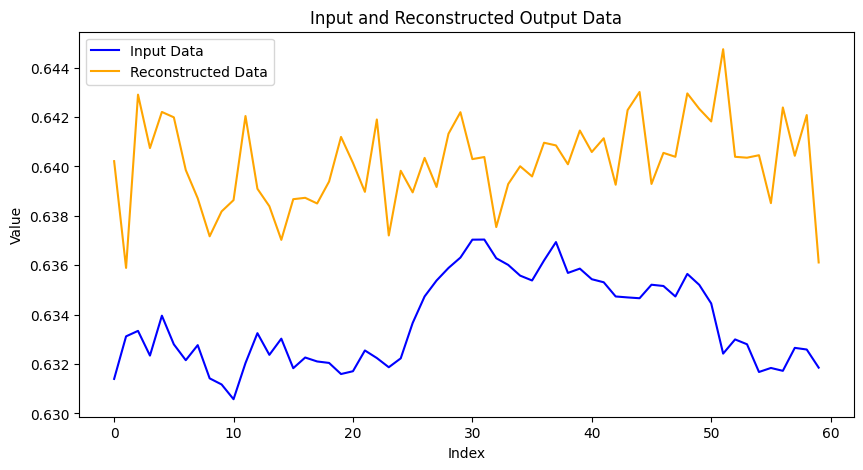

[0.64232839 0.64421726 0.64448177 0.64275922 0.64631851 0.64611354
 0.6467072  0.64740204 0.64604614 0.64524618 0.64551702 0.64499299
 0.64400304 0.6442966  0.64336821 0.64220482 0.64349547 0.6450621
 0.64530145 0.64297675 0.6438423  0.64455183 0.64417488 0.64452379
 0.64426374 0.64392763 0.64556595 0.64657385 0.64340866 0.64040705
 0.63726471 0.63795314 0.63553015 0.63305085 0.63060233 0.63151127
 0.63515685 0.63561929 0.63593609 0.63524455 0.63570697 0.63673132
 0.63615713 0.63578604 0.63500597 0.63264308 0.63036516 0.62928368
 0.62905321 0.63048008 0.62716577 0.62914987 0.6312783  0.62907475
 0.63074111 0.62922998 0.63102823 0.63068001 0.63341012 0.63280369]
[0.6457644  0.6413507  0.648677   0.6463394  0.6474732  0.6474315
 0.6452443  0.6441224  0.6423945  0.6434766  0.6440844  0.6473313
 0.64467007 0.6438444  0.6423319  0.64388436 0.6441301  0.64381576
 0.6448465  0.64651114 0.645543   0.64425564 0.6470607  0.6424157
 0.6453442  0.64413303 0.645551   0.6444465  0.646611   0.6475552

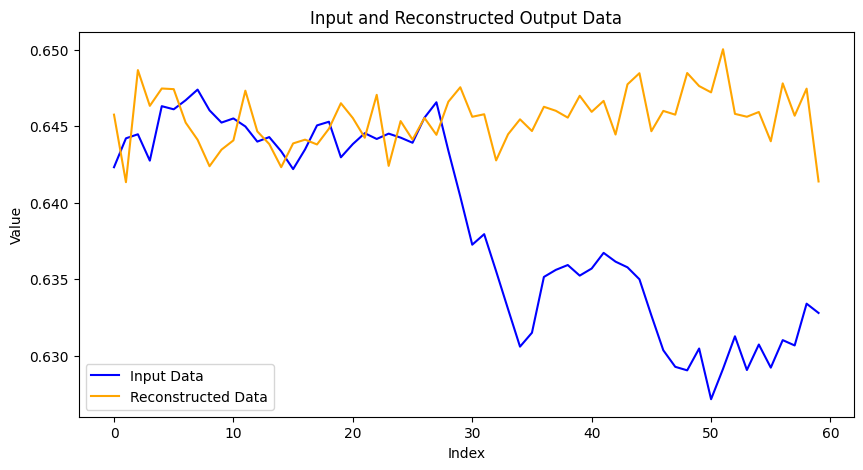

[0.63496864 0.63535632 0.63633169 0.63654746 0.63631376 0.63951928
 0.63997496 0.64022018 0.63968774 0.63901461 0.63634884 0.63603315
 0.6352978  0.63583441 0.6366503  0.63520552 0.63518434 0.63443255
 0.63781977 0.63769202 0.63743647 0.63842549 0.63881215 0.63821316
 0.63835303 0.63963472 0.64079889 0.64058863 0.63928494 0.63985953
 0.64127562 0.64096122 0.64018696 0.64053526 0.64040082 0.64291787
 0.64247372 0.64303712 0.64212104 0.64061087 0.64092523 0.63955905
 0.63949167 0.63983859 0.64146406 0.64041973 0.64092076 0.64084392
 0.64186399 0.64107797 0.64173725 0.64304753 0.64235102 0.64155104
 0.64219758 0.64142845 0.64304928 0.64264697 0.64243524 0.64225064]
[0.6471208  0.64269775 0.65010494 0.6476952  0.6491332  0.6488928
 0.64671266 0.64556205 0.6439711  0.64506    0.6455795  0.64900047
 0.64610374 0.6452629  0.6438181  0.6454378  0.64560425 0.6452083
 0.646217   0.64801383 0.64705735 0.6457338  0.6486604  0.64391685
 0.64664006 0.6456414  0.6469721  0.6458019  0.64825803 0.64904

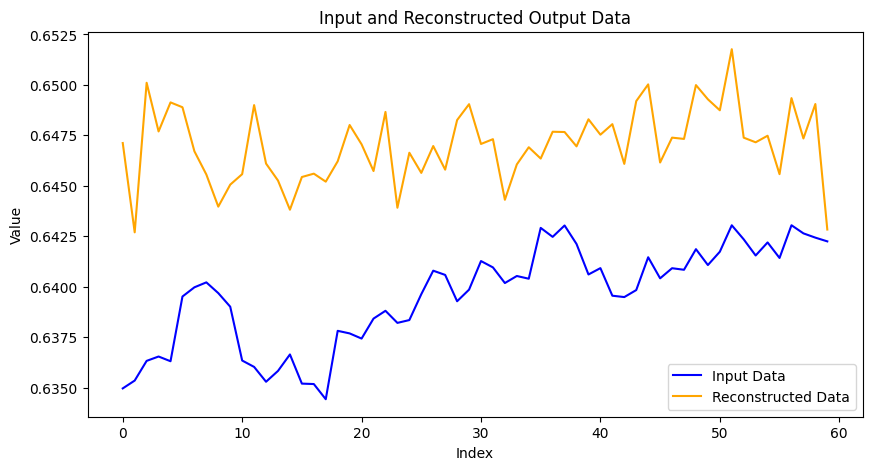

[0.64176291 0.64116649 0.6407024  0.64110561 0.64241777 0.64422702
 0.64440023 0.64442461 0.6436296  0.6441833  0.64382904 0.64588469
 0.64713349 0.64580556 0.64544185 0.64565735 0.64619445 0.64556745
 0.64605562 0.64469836 0.64320857 0.64213557 0.64216171 0.64195501
 0.64370855 0.64263037 0.64412475 0.64439973 0.64411021 0.64419692
 0.64516681 0.64402912 0.64458742 0.64471697 0.64430143 0.64394318
 0.64275579 0.64356758 0.64304622 0.64331975 0.64478109 0.64386919
 0.64256049 0.64160728 0.64217686 0.6405914  0.64102366 0.6418894
 0.64289297 0.6426042  0.64341065 0.64345098 0.64174159 0.63847058
 0.63931416 0.63944545 0.64015771 0.64021069 0.64015322 0.64046755]
[0.6508352  0.646365   0.653946   0.65141004 0.6527527  0.6525176
 0.6504039  0.6492059  0.64756125 0.6486422  0.6492434  0.65257233
 0.64988136 0.6488787  0.647422   0.64898264 0.6492733  0.6487893
 0.64991957 0.6515757  0.65067273 0.64936215 0.6521363  0.64751583
 0.65029615 0.64922744 0.6505208  0.64931124 0.6518226  0.652618

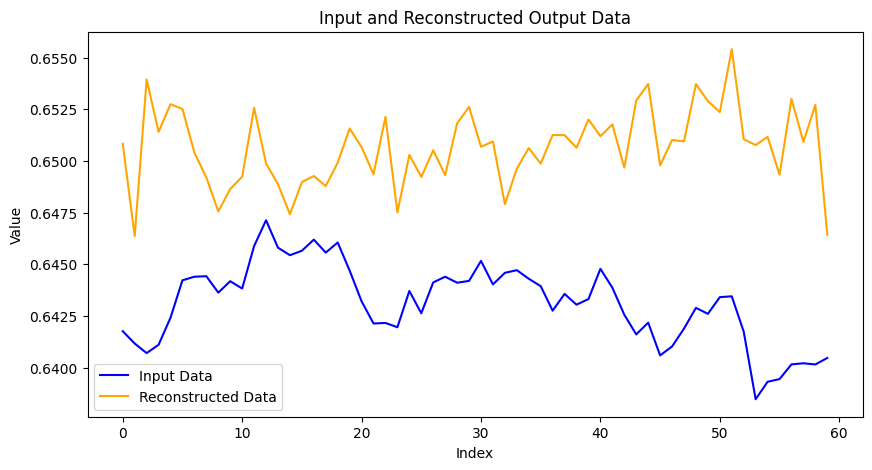

[0.64083759 0.63967538 0.63992253 0.63970903 0.64128613 0.6411657
 0.64149293 0.64124983 0.63955063 0.64109751 0.64119855 0.64277232
 0.64438898 0.64290767 0.64248563 0.64341278 0.64436086 0.64321199
 0.64390453 0.64444996 0.64471583 0.64518589 0.64447471 0.64491767
 0.64639058 0.64619783 0.64645285 0.64650564 0.64565019 0.64545451
 0.64449975 0.64379839 0.64371588 0.64393183 0.64424168 0.64573748
 0.64662792 0.64723799 0.64655844 0.64686872 0.64788292 0.64655981
 0.64565502 0.6468361  0.64886683 0.64852256 0.64875815 0.64770809
 0.64764342 0.64627402 0.64672313 0.64730524 0.64528658 0.64554105
 0.6444803  0.64427848 0.6440875  0.64536634 0.64640732 0.64604827]
[0.6520831  0.6475928  0.65526795 0.6526825  0.65410113 0.65380543
 0.6516794  0.65047884 0.64886755 0.649974   0.6505517  0.6539486
 0.65115637 0.6501689  0.6486823  0.6502857  0.65055394 0.6500341
 0.6511554  0.6528789  0.6519842  0.6506219  0.6534532  0.6487691
 0.65152806 0.6504686  0.6517445  0.6505309  0.65318584 0.6539263

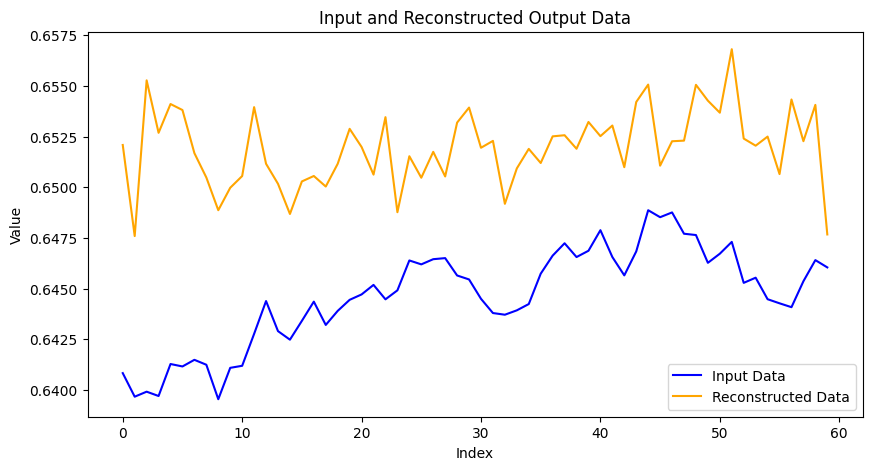

[0.6464752  0.64593117 0.64472173 0.64338468 0.64493825 0.6444757
 0.64353404 0.64441603 0.64337252 0.64329185 0.64496864 0.64583324
 0.64653313 0.6472888  0.64577603 0.64785052 0.64936467 0.64991006
 0.65112054 0.6502743  0.65061639 0.65054966 0.65016298 0.64970416
 0.65058445 0.65129299 0.65274639 0.65216687 0.64893549 0.64955236
 0.64972505 0.6495411  0.64915024 0.65022146 0.64992617 0.65158176
 0.65126079 0.6511993  0.65109008 0.65107776 0.65027355 0.64949894
 0.64959818 0.65006439 0.65026665 0.65017918 0.64886962 0.64902779
 0.64828654 0.64836616 0.64898008 0.64941693 0.64926933 0.64869016
 0.64880544 0.64850202 0.64824897 0.64742517 0.64899819 0.64838   ]
[0.6567318  0.65217865 0.6600794  0.65730953 0.65871984 0.6583806
 0.65632415 0.65507525 0.6534384  0.6545708  0.65520287 0.65854603
 0.6558856  0.6547314  0.65325445 0.6547894  0.655164   0.6545276
 0.65577847 0.6574015  0.6565771  0.65518576 0.6579271  0.6533115
 0.6560951  0.6550146  0.65619636 0.6549461  0.65777105 0.6584677

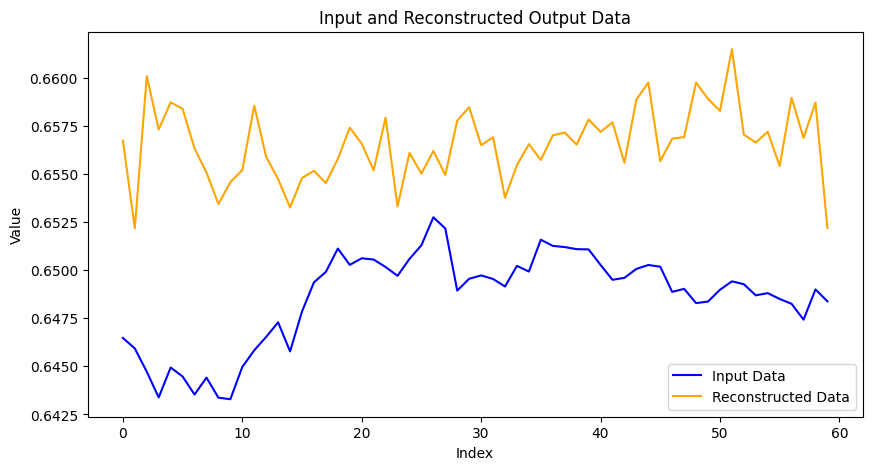

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Define the input size
input_size = 60

# Input layer
input_layer = Input(shape=(input_size,))

# Encoder
encoded = Dense(55, activation='tanh')(input_layer)
encoded = Dense(50, activation='tanh')(encoded)
encoded = Dense(45, activation='tanh')(encoded)
encoded = Dense(40, activation='tanh')(encoded)
encoded = Dense(35, activation='tanh')(encoded)
encoded = Dense(30, activation='tanh')(encoded)

# Decoder
decoded = Dense(35, activation='tanh')(encoded)
decoded = Dense(40, activation='tanh')(decoded)
decoded = Dense(45, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(decoded)
decoded = Dense(55, activation='tanh')(decoded)
decoded = Dense(input_size, activation='tanh')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model summary
autoencoder.summary()


# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=100)

# Predict using the autoencoder
encoded_data = autoencoder.predict(test_data)

# Evaluate the model on the test data
loss = autoencoder.evaluate(test_data, test_data)
print(f'Test loss: {loss}')



for i in range(10):
# Plot the first test sample's input and reconstructed output
    print(test_data[i])
    print(encoded_data[i])
    inputData = test_data[i]
    outputData = encoded_data[i]
    mse = np.mean((inputData - outputData) ** 2)
    print("Input Data:", inputData)
    print("Reconstructed Data:", outputData)
    print("Mean Squared Error (MSE):", mse)
    plt.figure(figsize=(10, 5))
    plt.plot(test_data[i], label='Input Data', color='blue')
    plt.plot(encoded_data[i], label='Reconstructed Data', color='orange')
    plt.title('Input and Reconstructed Output Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


